In [1]:
from src.dl.inference.inferer import Inferer
import src.dl.lightning as lightning
from src.config import CONFIG

In [2]:
lightning_model = lightning.SegModel.from_conf(CONFIG)

inferer = Inferer(
    lightning_model,
    dataset="consep",
    stride_size=80,
    fn_pattern="*",
    model_weights="last",
    apply_weights=True,
    post_proc_method="hover",
    normalize_input=True
)

In [3]:
inferer.run_inference()

Inference: /home/local/leos/Dippa/datasets/data/consep/test/images: 100%|██████████| 2/2 [01:05<00:00, 32.77s/batch, patches=4046/4046]


In [4]:
inferer.post_process()

100%|██████████| 14/14 [00:40<00:00,  2.90s/it]


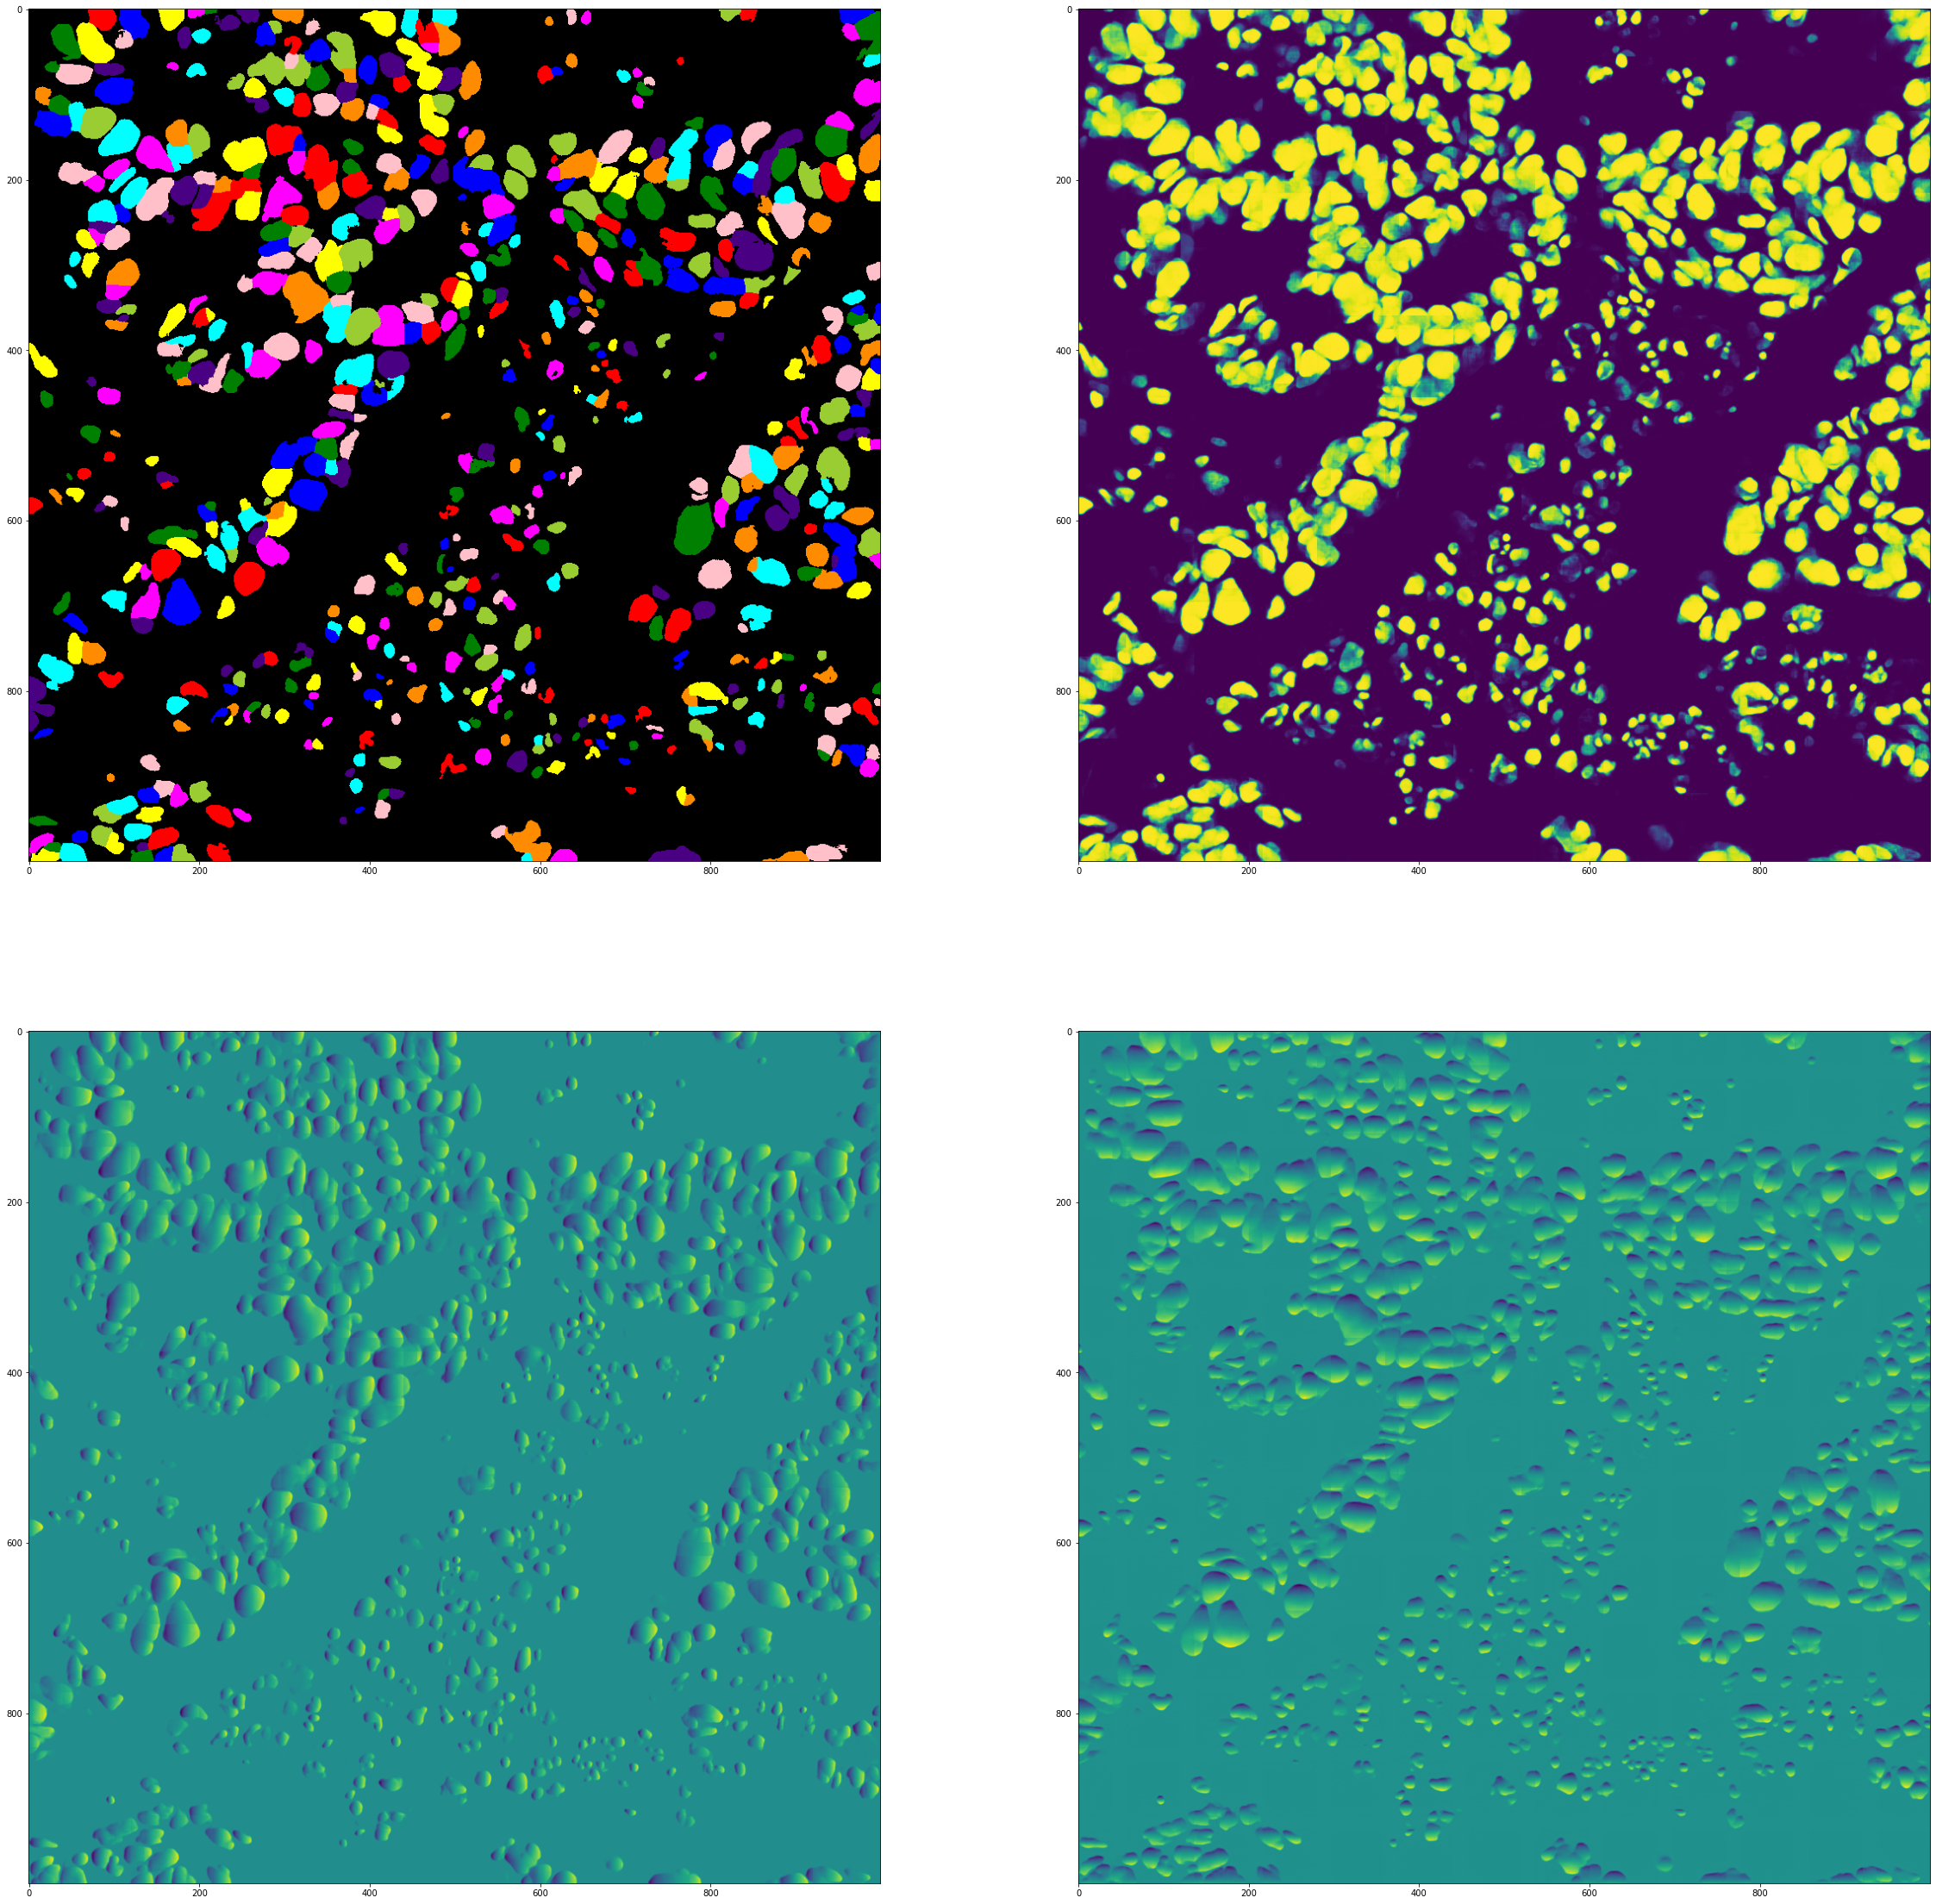

In [5]:
# import matplotlib.pyplot as plt
# from skimage.color import label2rgb

# fig, ax = plt.subplots(2, 2, figsize=(40, 40))
# ax = ax.flatten()
# ax[0].imshow(label2rgb(inferer.inst_maps["test_11"], bg_label=0))
# ax[1].imshow(inferer.soft_insts["test_11"][..., 1])
# ax[2].imshow(inferer.aux_maps["test_11"][..., 0])
# ax[3].imshow(inferer.aux_maps["test_11"][..., 1])

In [6]:
pattern_list = None
binary_scores = inferer.benchmark_insts(pattern_list=pattern_list, file_prefix="testi")
binary_scores

100%|██████████| 14/14 [01:22<00:00,  5.86s/it]


AJI  AJI_plus     DICE2        PQ        SQ  \
name                                                                     
test_1                0.525351  0.572247  0.463859  0.532046  0.762819   
test_10               0.588302  0.607424  0.476043  0.584883  0.788828   
test_11               0.421489  0.503121  0.432649  0.349197  0.734592   
test_12               0.615646  0.654858  0.614885  0.608172  0.776801   
test_13               0.569938  0.611262  0.625371  0.545345  0.780341   
test_14               0.630971  0.638513  0.608503  0.623516  0.799380   
test_2                0.520593  0.533272  0.702710  0.493849  0.759378   
test_3                0.569215  0.608331  0.473203  0.531035  0.771630   
test_4                0.593157  0.620446  0.482856  0.520508  0.773798   
test_5                0.526247  0.568033  0.507057  0.554114  0.767716   
test_6                0.573599  0.601244  0.675764  0.580885  0.785322   
test_7                0.452958  0.479809  0.628227  0.407338  0.716612   
test_8                0.455711  0.503176  0.353822  0.427888  0.743303   
test_9                0.509204  0.542124  0.635808  0.526387  0.772266   
averages_for_the_set  0.539456  0.574561  0.548625  0.520369  0.766628   

                            DQ  inst_recall  inst_precision    splits  \
name                                                                    
test_1                0.697474     0.654335        0.746702  0.539357   
test_10               0.741458     0.770414        0.714599  0.893807   
test_11               0.475362     0.380687        0.632716  0.722531   
test_12               0.782918     0.771028        0.795181  0.465707   
test_13               0.698854     0.628403        0.787097  0.623695   
test_14               0.780000     0.911871        0.681452  1.121665   
test_2                0.650334     0.595918        0.715686  0.261377   
test_3                0.688199     0.703046        0.673966  0.491401   
test_4                0.672666     0.715311        0.634820  0.668686   
test_5                0.721769     0.681319        0.767327  0.675179   
test_6                0.739677     0.686667        0.801556  0.270931   
test_7                0.568421     0.448133        0.776978  0.125429   
test_8                0.575658     0.559105        0.593220  0.844800   
test_9                0.681614     0.592593        0.802111  0.216645   
averages_for_the_set  0.676743     0.649916        0.723101  0.565801   

                        merges  
name                            
test_1                0.632527  
test_10               0.397312  
test_11               0.808710  
test_12               0.323372  
test_13               0.799518  
test_14               0.291323  
test_2                0.505099  
test_3                0.578372  
test_4                0.577148  
test_5                0.956033  
test_6                0.293100  
test_7                0.226928  
test_8                0.666733  
test_9                0.540018  
averages_for_the_set  0.542585

In [7]:
pattern_list = None
type_scores = inferer.benchmark_types(pattern_list=pattern_list, file_prefix="testi")
type_scores = type_scores[type_scores.index.str.contains("avg")]
type_scores

100%|██████████| 14/14 [00:23<00:00,  1.69s/it]


AJI  AJI_plus     DICE2        PQ  \
name                                                                   
miscellanous_avg_for_the_set  0.094271  0.094026  0.353713  0.101547   
inflammatory_avg_for_the_set  0.402731  0.404624  0.804562  0.461389   
epithelial_avg_for_the_set    0.508866  0.544941  0.444052  0.463013   
spindle_avg_for_the_set       0.355095  0.363152  0.646544  0.371494   

                                    SQ        DQ  inst_recall  inst_precision  \
name                                                                            
miscellanous_avg_for_the_set  0.415409  0.139347     0.128313        0.351168   
inflammatory_avg_for_the_set  0.834883  0.554152     0.609761        0.613568   
epithelial_avg_for_the_set    0.761642  0.604641     0.637205        0.586652   
spindle_avg_for_the_set       0.756895  0.494210     0.470293        0.549327   

                                splits    merges  
name                                              
miscellanous_avg_for_the_set  0.014148  0.084191  
inflammatory_avg_for_the_set  0.118605  0.077432  
epithelial_avg_for_the_set    0.601634  0.398353  
spindle_avg_for_the_set       0.209859  0.358677